In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

Rs = 6.4 #Ohm
Xls = 5.85 #Ohm
Rr = 4.25 #Ohm
Xlr = 5.85 #Ohm
Xm = 137.8 #Ohm

Polos = 4

fs = 60 #Hz

# Vs = 220 * np.sqrt(3) #V
Vs = 220
Vl = Vs

n = 1715 # RPM
wn = n * 2 * pi / 60 # Velocidade do rotor (rad/s)
print(f'n = {n} RPM')
print(f'wn = {wn} rad/s\n')

ws = fs * 2 * pi * (2 / Polos)# rad/s
print(f'ws = {ws} rad/s')

ns = 120 * fs / Polos
print(f'ns = {ns} RPM\n')

s = (ns - n) / ns
print(f's = {s}')

sVect = np.linspace(0.001, 1, 500)

n = 1715 RPM
wn = 179.5943800302165 rad/s

ws = 188.49555921538757 rad/s
ns = 1800.0 RPM

s = 0.04722222222222222


In [ ]:
# Impedancia do estator
Zs = (1j * Xm * (Rs + 1j * Xls)) / (Rs + 1j * Xls + 1j*Xm)
print(f'Zs = {Zs}')

# Impedancia Rotor
Zr = Rr / sVect + 1j*(Xlr)
# print(f'Zr = {Zr}')

# Impedancia de entrada
Z = Zs + Zr
# print(f'Z = {Z}')

Zs = (5.877680187432147+5.8736314180269105j)


Ismax = 14.20054133819864
Irmax = 13.905333585439331


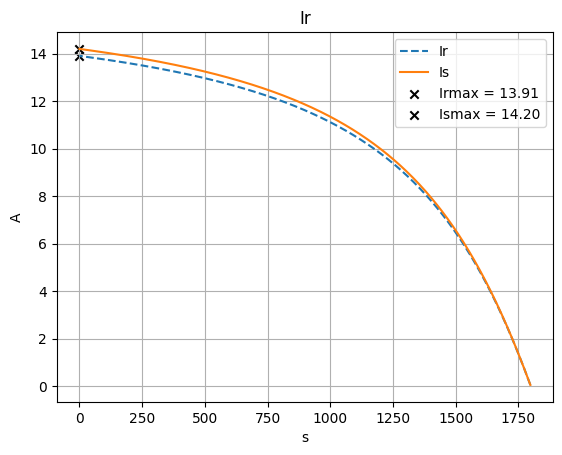

In [ ]:
# Corrente no estator
Is = Vs / np.abs(Z)
Ismax = Vs / (Zs + Rr / 1 + 1j*(Xlr))
print(f'Ismax = {np.abs(Ismax)}')

# Corrente no rotor
Ir = Vs / (Rs + Rr / sVect + 1j*(Xls+Xlr))
Irmax =  Vs / (Rs + Rr / 1 + 1j*(Xls+Xlr))
print(f'Irmax = {np.abs(Irmax)}')


fig = plt.figure()

ax1 = fig.subplots()

ax1.plot((1-sVect)*ns, np.abs(Ir), label="Ir", linestyle='--')
ax1.plot((1-sVect)*ns, np.abs(Is), label="Is", linestyle='-')
ax1.scatter(0, np.abs(Irmax), color="black",
            label=f'Irmax = {np.abs(Irmax):.2f}', marker='x')
ax1.scatter(0, np.abs(Ismax), color="black",
            label=f'Ismax = {np.abs(Ismax):.2f}', marker='x')

ax1.legend()
ax1.set_title('Ir')
ax1.set_ylabel('A')
ax1.set_xlabel('s')
ax1.grid()
# ax1.invert_xaxis()

fig.savefig("Correntes.pdf")

fig.show()

Tpartida = 13.078920067516753

smax = 0.3186852736268993
RPM em smax = 1226.3665074715814 RPM
Tmax = 19.51530981512811 N.m
Tnominal = 7.351961400322337



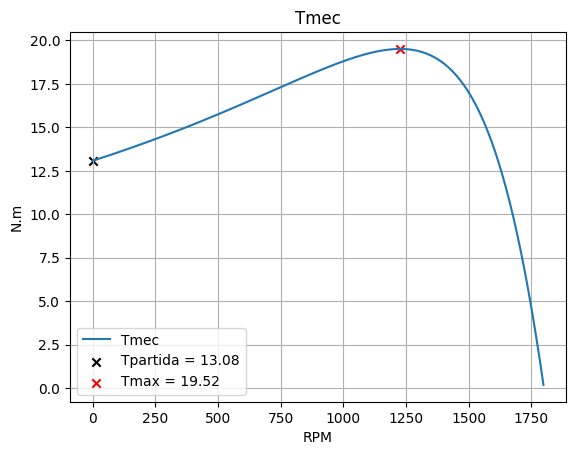

In [ ]:
# Curva de torque

Tmec = (3 / ws) * ((Vs**2) / ((Rs + Rr / sVect) + 1j*(Xls+Xlr))**2) * (Rr/sVect)

sPartida = 1
Tpartida = np.abs((3 / ws) * ((Vs**2) / ((Rs + Rr / sPartida) +
                                         1j*(Xls+Xlr))**2) * (Rr / sPartida))
print(f'Tpartida = {Tpartida}\n')

smax = Rr / np.sqrt(Rs**2 + (Xls+Xlr)**2)
Tmax = np.abs((3 / ws) * ((Vs**2) / ((Rs + Rr / smax) +
                                     1j*(Xls+Xlr))**2) * (Rr / smax))
print(f'smax = {smax}')
print(f'RPM em smax = {(1-smax)*ns} RPM')
print(f'Tmax = {Tmax} N.m')

Tnominal = (3 / ws) * ((Vs**2) / ((Rs + Rr / s) + 1j*(Xls+Xlr))**2) * (Rr/s)
print(f'Tnominal = {np.abs(Tnominal)}')

print()

fig = plt.figure()

ax1 = fig.subplots()

ax1.plot((1-sVect)*ns, np.abs(Tmec), label="Tmec")

ax1.scatter(0, Tpartida, color="black",
            label=f'Tpartida = {Tpartida:.2f}', marker='x')
ax1.scatter((1-smax)*ns, Tmax, color="red",
            label=f'Tmax = {Tmax:.2f}', marker='x')

ax1.legend()
ax1.set_title('Tmec')
ax1.set_ylabel('N.m')
ax1.set_xlabel('RPM')
ax1.grid()
# ax1.invert_xaxis()

fig.savefig("CurvaVelocidadeTorque.pdf")

fig.show()

# Gráficos Simulação

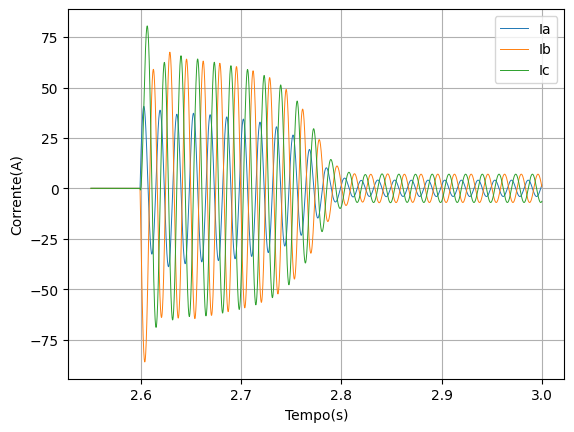

In [ ]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

dados = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/ACEPOT AME/U3/dados.txt')

timeStep = 1e5

cutoffI = int(2.55*timeStep)
cutoffF = int(3*timeStep)

# Time IA IB IC VA VB VC torque
Tempo = dados[:, 0]
Ia = dados[:, 1]
Ib = dados[:, 2]
Ic = dados[:, 3]
Va = dados[:, 4]
Vb = dados[:, 5]
Vc = dados[:, 6]
Torque = dados[:, 7]

fig = plt.figure()

fig1 = fig.subplots()

fig1.plot(Tempo[cutoffI:cutoffF], Ia[cutoffI:cutoffF], label="Ia",linewidth=0.7)
fig1.plot(Tempo[cutoffI:cutoffF], Ib[cutoffI:cutoffF], label="Ib",linewidth=0.7)
fig1.plot(Tempo[cutoffI:cutoffF], Ic[cutoffI:cutoffF], label="Ic",linewidth=0.7)

fig1.set_xlabel("Tempo(s)")
fig1.set_ylabel("Corrente(A)")
fig1.grid()
fig1.legend()

fig.savefig("CorrenteFases.pdf")

fig.show()

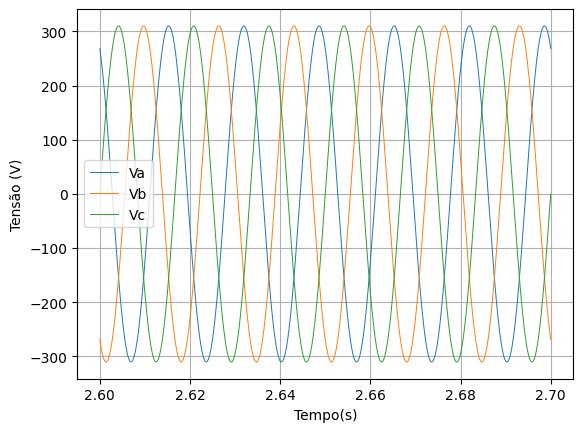

In [ ]:
cutoffI = int(2.6*timeStep)
cutoffF = int(2.7*timeStep)

fig = plt.figure()

fig1 = fig.subplots()

fig1.plot(Tempo[cutoffI:cutoffF], Va[cutoffI:cutoffF], label="Va",linewidth=0.7)
fig1.plot(Tempo[cutoffI:cutoffF], Vb[cutoffI:cutoffF], label="Vb",linewidth=0.7)
fig1.plot(Tempo[cutoffI:cutoffF], Vc[cutoffI:cutoffF], label="Vc",linewidth=0.7)

fig1.set_xlabel("Tempo(s)")
fig1.set_ylabel("Tensão (V)")
fig1.grid()
fig1.legend()

fig.savefig("TensoesFases.pdf")

fig.show()

1778.4085217063466


/tmp/ipython-input-35-2160001774.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend()


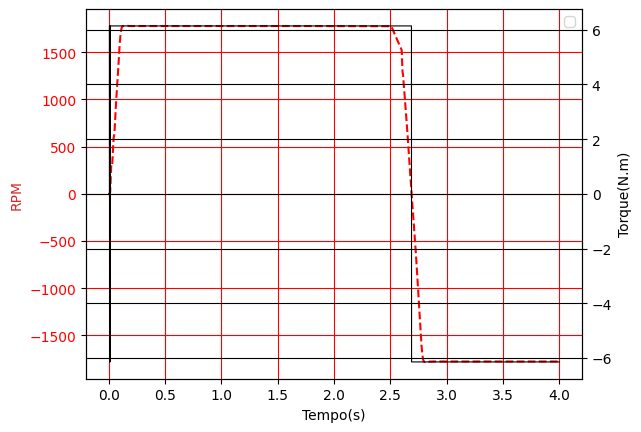

In [ ]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

dados = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/ACEPOT AME/U3/dadosvelocidade.txt')

timeStep = 1e5


# Time IA IB IC VA VB VC torque
Tempo = dados[:, 0]
velocidade = dados[:, 1]

print(np.max(velocidade))

fig, ax1 = plt.subplots()

ax1.plot(Tempo, velocidade, color='red', linestyle='--')
ax1.set_xlabel("Tempo(s)")
ax1.set_ylabel("RPM", color='tab:red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid(color='red')
ax1.legend()

ax2 = ax1.twinx()
ax2.plot(Tempo, Torque[:len(velocidade)], color='black', linewidth=0.8)
ax2.set_ylabel("Torque(N.m)", color="black")
ax2.tick_params(axis='y', labelcolor='black')
ax2.grid(color='black')

fig.savefig("VelocidadeTorque.pdf")

fig.show()

# Exemplos

## Exp1


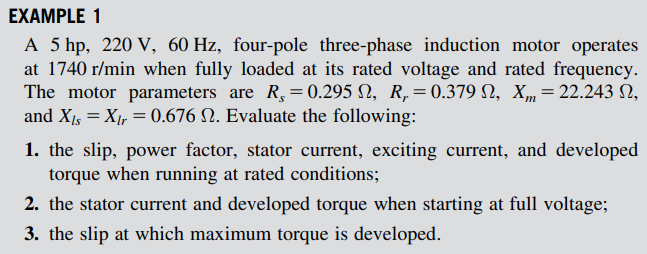

n = 1740 RPM
wn = 182.212373908208 rad/s

ws = 188.49555921538757 rad/s
ns = 1800.0 RPM

s = 0.03333333333333333
Zs = (0.277735757379668+0.6624609130279646j)
Ismax = 85.04129463613697
Irmax = 83.7809861406505


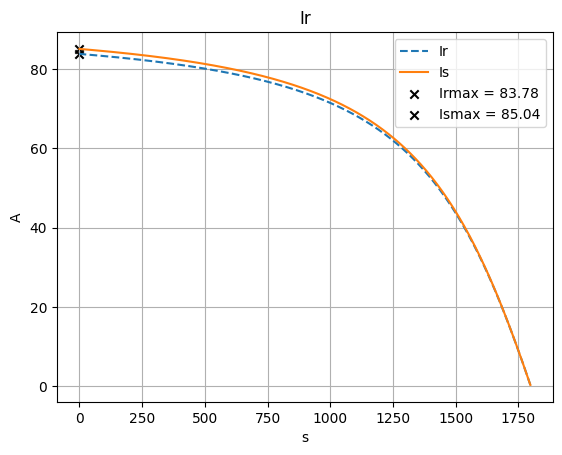

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

Rs = 0.295 #Ohm
Xls = 0.679 #Ohm
Rr = 0.379 #Ohm
Xlr = Xls #Ohm
Xm = 22.243 #Ohm

Polos = 4

fs = 60 #Hz

Vs = 220 / np.sqrt(3) #V
Vl = Vs

n = 1740 # RPM
wn = n * 2 * pi / 60 # Velocidade do rotor (rad/s)
print(f'n = {n} RPM')
print(f'wn = {wn} rad/s\n')

ws = fs * 2 * pi * (2 / Polos)# rad/s
print(f'ws = {ws} rad/s')

ns = 120 * fs / Polos
print(f'ns = {ns} RPM\n')

s = (ns - n) / ns
print(f's = {s}')

sVect = np.linspace(0.001, 1, 500)

# Impedancia do estator
Zs = (1j * Xm * (Rs + 1j * Xls)) / (Rs + 1j * Xls + 1j*Xm)
print(f'Zs = {Zs}')

# Impedancia Rotor
Zr = Rr / sVect + 1j*(Xlr)
# print(f'Zr = {Zr}')

# Impedancia de entrada
Z = Zs + Zr
# print(f'Z = {Z}')

# Corrente no estator
Is = Vs / np.abs(Z)
Ismax = Vs / (Zs + Rr / 1 + 1j*(Xlr))
print(f'Ismax = {np.abs(Ismax)}')

# Corrente no rotor
Ir = Vs / (Rs + Rr / sVect + 1j*(Xls+Xlr))
Irmax =  Vs / (Rs + Rr / 1 + 1j*(Xls+Xlr))
print(f'Irmax = {np.abs(Irmax)}')


fig = plt.figure()

ax1 = fig.subplots()

ax1.plot((1-sVect)*ns, np.abs(Ir), label="Ir", linestyle='--')
ax1.plot((1-sVect)*ns, np.abs(Is), label="Is", linestyle='-')
ax1.scatter(0, np.abs(Irmax), color="black",
            label=f'Irmax = {np.abs(Irmax):.2f}', marker='x')
ax1.scatter(0, np.abs(Ismax), color="black",
            label=f'Ismax = {np.abs(Ismax):.2f}', marker='x')

ax1.legend()
ax1.set_title('Ir')
ax1.set_ylabel('A')
ax1.set_xlabel('s')
ax1.grid()
# ax1.invert_xaxis()

fig.show()

Tpartida = 42.33994381842309

smax = 0.2688142706985998
RPM em smax = 1316.1343127425203 RPM
Tmax = 76.2011331251972 N.m



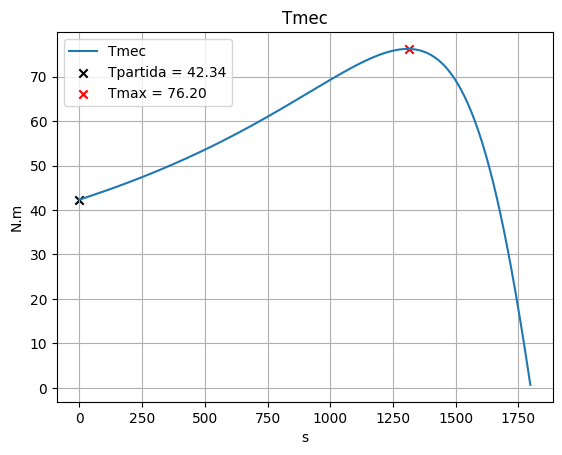

In [ ]:
# Curva de torque

Tmec = (3 / ws) * ((Vs**2) / ((Rs + Rr / sVect) + 1j*(Xls+Xlr))**2) * (Rr/sVect)

sPartida = 1
Tpartida = np.abs((3 / ws) * ((Vs**2) / ((Rs + Rr / sPartida) +
                                         1j*(Xls+Xlr))**2) * (Rr / sPartida))
print(f'Tpartida = {Tpartida}\n')

smax = Rr / np.sqrt(Rr**2 + (Xls+Xlr)**2)
Tmax = np.abs((3 / ws) * ((Vs**2) / ((Rs + Rr / smax) +
                                     1j*(Xls+Xlr))**2) * (Rr / smax))
print(f'smax = {smax}')
print(f'RPM em smax = {(1-smax)*ns} RPM')
print(f'Tmax = {Tmax} N.m')

print()

fig = plt.figure()

ax1 = fig.subplots()

ax1.plot((1-sVect)*ns, np.abs(Tmec), label="Tmec")

ax1.scatter(0, Tpartida, color="black",
            label=f'Tpartida = {Tpartida:.2f}', marker='x')
ax1.scatter((1-smax)*ns, Tmax, color="red",
            label=f'Tmax = {Tmax:.2f}', marker='x')

ax1.legend()
ax1.set_title('Tmec')
ax1.set_ylabel('N.m')
ax1.set_xlabel('s')
ax1.grid()
# ax1.invert_xaxis()

fig.show()

## Exp 2

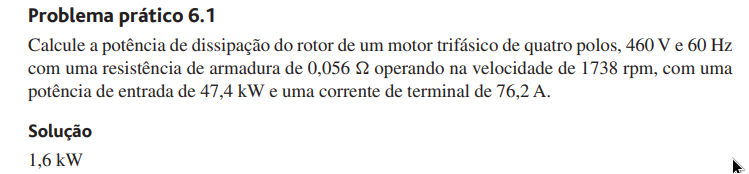

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

Rs = 0.056 # Ohm

I = 76.2 # A

Vs3 = 460 # V (tensão de fase)
Vs = Vs3 / np.sqrt(3) # V (tensão de linha)

fs = 60 # Hz (frequncia síncrona)

n = 1738 # RPM

Polos = 4

Pinput = 47.4e3 #kW

ns = 120 * fs / Polos
print(f'ns = {ns} RPM')

s = (ns - n) / ns
print(f's = {s}')

Pag_estator = 3 * I**2 * Rs
print(f'Pag_estator = {Pag_estator} W')

Pag = Pinput - Pag_estator
print(f'Pag = {Pag} W')

Pag_rotor = s * Pag
print(f'Pag_rotor = {Pag_rotor} W')

ns = 1800.0 RPM
s = 0.034444444444444444
Pag_estator = 975.4819200000001 W
Pag = 46424.51808 W
Pag_rotor = 1599.0667338666667 W


# P3 ACEPOT

n = 1755 RPM
wn = 183.78317023500287 rad/s

ws = 188.49555921538757 rad/s
ns = 1800.0 RPM

s = 0.025
Zs = (0.09524236877841412+0.34223534274074513j)
Ismax = 358.59582431145856
Irmax = 354.56474231150503


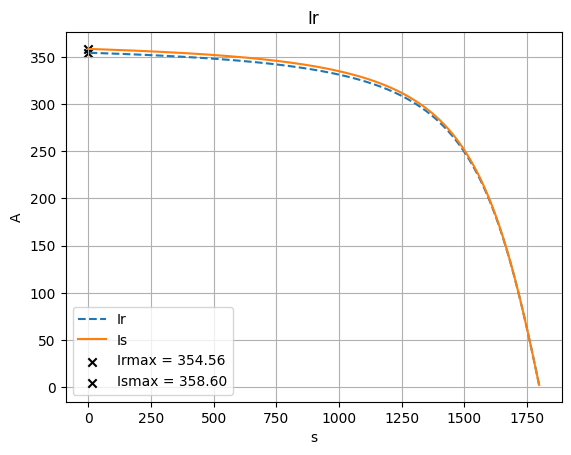

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

Rs = 0.10 #Ohm
Xls = 0.35 #Ohm
Rr = 0.12 #Ohm
Xlr = 0.4 #Ohm
Xm = 14.2 #Ohm

Polos = 4

fs = 60 #Hz

Vs = 480 / np.sqrt(3) #V
Vl = Vs

n = 1755 # RPM
wn = n * 2 * pi / 60 # Velocidade do rotor (rad/s)
print(f'n = {n} RPM')
print(f'wn = {wn} rad/s\n')

ws = fs * 2 * pi * (2 / Polos)# rad/s
print(f'ws = {ws} rad/s')

ns = 120 * fs / Polos
print(f'ns = {ns} RPM\n')

s = (ns - n) / ns
print(f's = {s}')

sVect = np.linspace(0.001, 1, 500)

# Impedancia do estator
Zs = (1j * Xm * (Rs + 1j * Xls)) / (Rs + 1j * Xls + 1j*Xm)
print(f'Zs = {Zs}')

# Impedancia Rotor
Zr = Rr / sVect + 1j*(Xlr)
# print(f'Zr = {Zr}')

# Impedancia de entrada
Z = Zs + Zr
# print(f'Z = {Z}')

# Corrente no estator
Is = Vs / np.abs(Z)
Ismax = Vs / (Zs + Rr / 1 + 1j*(Xlr))
print(f'Ismax = {np.abs(Ismax)}')

# Corrente no rotor
Ir = Vs / (Rs + Rr / sVect + 1j*(Xls+Xlr))
Irmax =  Vs / (Rs + Rr / 1 + 1j*(Xls+Xlr))
print(f'Irmax = {np.abs(Irmax)}')


fig = plt.figure()

ax1 = fig.subplots()

ax1.plot((1-sVect)*ns, np.abs(Ir), label="Ir", linestyle='--')
ax1.plot((1-sVect)*ns, np.abs(Is), label="Is", linestyle='-')
ax1.scatter(0, np.abs(Irmax), color="black",
            label=f'Irmax = {np.abs(Irmax):.2f}', marker='x')
ax1.scatter(0, np.abs(Ismax), color="black",
            label=f'Ismax = {np.abs(Ismax):.2f}', marker='x')

ax1.legend()
ax1.set_title('Ir')
ax1.set_ylabel('A')
ax1.set_xlabel('s')
ax1.grid()
# ax1.invert_xaxis()

fig.show()

Tpartida = 240.1001727835829

smax = 0.15799050110667287
RPM em smax = 1515.6170980079887 RPM
Tmax = 713.4303257201474 N.m

Tpartida = 432.61228595632144



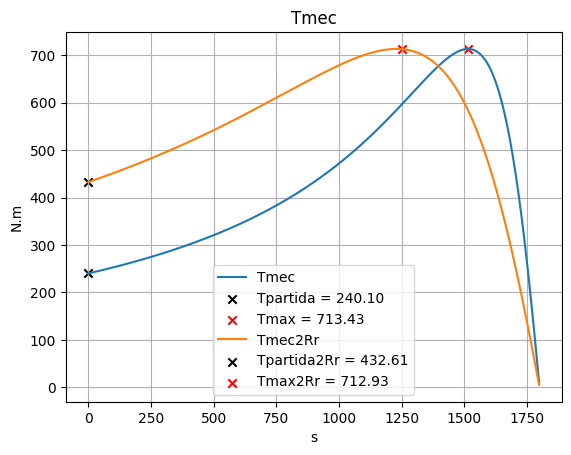

In [ ]:
# Curva de torque

Tmec = (3 / ws) * ((Vs**2) / ((Rs + Rr / sVect) + 1j*(Xls+Xlr))**2) * (Rr/sVect)

sPartida = 1
Tpartida = np.abs((3 / ws) * ((Vs**2) / ((Rs + Rr / sPartida) +
                                         1j*(Xls+Xlr))**2) * (Rr / sPartida))
print(f'Tpartida = {Tpartida}\n')

smax = Rr / np.sqrt(Rr**2 + (Xls+Xlr)**2)
Tmax = np.abs((3 / ws) * ((Vs**2) / ((Rs + Rr / smax) +
                                     1j*(Xls+Xlr))**2) * (Rr / smax))
print(f'smax = {smax}')
print(f'RPM em smax = {(1-smax)*ns} RPM')
print(f'Tmax = {Tmax} N.m')

print()

fig = plt.figure()

ax1 = fig.subplots()

ax1.plot((1-sVect)*ns, np.abs(Tmec), label="Tmec")

ax1.scatter(0, Tpartida, color="black",
            label=f'Tpartida = {Tpartida:.2f}', marker='x')
ax1.scatter((1-smax)*ns, Tmax, color="red",
            label=f'Tmax = {Tmax:.2f}', marker='x')

Rr = 2 * Rr
Tmec = (3 / ws) * ((Vs**2) / ((Rs + Rr / sVect) + 1j*(Xls+Xlr))**2) * (Rr/sVect)

sPartida = 1
Tpartida = np.abs((3 / ws) * ((Vs**2) / ((Rs + Rr / sPartida) +
                                         1j*(Xls+Xlr))**2) * (Rr / sPartida))
print(f'Tpartida = {Tpartida}\n')

smax = Rr / np.sqrt(Rr**2 + (Xls+Xlr)**2)
Tmax = np.abs((3 / ws) * ((Vs**2) / ((Rs + Rr / smax) +
                                     1j*(Xls+Xlr))**2) * (Rr / smax))

ax1.plot((1-sVect)*ns, np.abs(Tmec), label="Tmec2Rr")

ax1.scatter(0, Tpartida, color="black",
            label=f'Tpartida2Rr = {Tpartida:.2f}', marker='x')
ax1.scatter((1-smax)*ns, Tmax, color="red",
            label=f'Tmax2Rr = {Tmax:.2f}', marker='x')

ax1.legend()
ax1.set_title('Tmec')
ax1.set_ylabel('N.m')
ax1.set_xlabel('s')
ax1.grid()
# ax1.invert_xaxis()

fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi

ns = 120 * fs / Polos
print(f'ns = {ns} RPM')

s = (ns - n) / ns
print(f's = {s}')

Pag_estator = 3 * I**2 * Rs
print(f'Pag_estator = {Pag_estator} W')

Pag = Pinput - Pag_estator
print(f'Pag = {Pag} W')

Pag_rotor = s * Pag
print(f'Pag_rotor = {Pag_rotor} W')

ns = 1800.0 RPM
s = 0.025
Pag_estator = 1741.932 W
Pag = 45658.068 W
Pag_rotor = 1141.4517 W
